#  import kit

In [1]:
import sys
from pathlib import Path
ROOT = Path().resolve().parents[1]
sys.path.append(str(ROOT / "src"))

In [ ]:
import importlib
import numpy as np
import matplotlib.pyplot as plt
from PEC_sampler_package import PEC_Readout_Module_Sampler as pecro
from PEC_sampler_package import PEC_TQG_Module_Sampler as peccx
from PEC_sampler_package import PEC_sampler as pec
from PEC_sampler_package import Restore_Retrieve as RR
import Bellstate_CHSH as chsh

import qiskit as q
from qiskit import QuantumCircuit
from qiskit.visualization import *
from qiskit.circuit.library import *
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
from qiskit_aer.primitives import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService

In [3]:
token = "PJubuPXreZKAxan0yV6OLEIkdKipFYGgvvkGQSZAtpMU"
instance = 'crn:v1:bluemix:public:quantum-computing:us-east:a/f071734952cb4c9993a642d0a87d18bb:392306ae-fe55-475c-a8c5-978d0ba1871e::'
name = "torino"
device_name = "ibm_" + name
QiskitRuntimeService.save_account(
        channel="ibm_quantum_platform",
        token=token,
        instance=instance,
        set_as_default=True,
        overwrite=True
    )
service = QiskitRuntimeService()
device = service.backend(device_name)
noise_model = NoiseModel.from_backend(device)

In [35]:
backend = AerSimulator.from_backend(device)
backend_options = {
    # "method": "automatic",
    "noise_model": noise_model,
    "basis_gates": noise_model.basis_gates,
    "coupling_map": device.configuration().coupling_map,
    # parallelism knobs
    # "max_parallel_experiments":32,
    # "max_parallel_threads": 0
    # "device": "GPU",  # if you have qiskit-aer-gpu
}
run_options = {
    "shots": 1024,
    # "seed_simulator": 12345,
}

sampler = SamplerV2(
    options={
        "backend_options": backend_options,
        "run_options": run_options,
        # "default_precision": 0.0,  # if you want deterministic path where applicable
    }
)
sampler.mode=backend
backendqubitNum = backend.num_qubits
print(backendqubitNum)

133


# Build Circuit

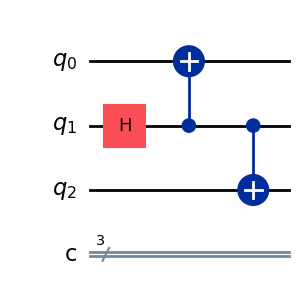

In [133]:
Bell_circuit = QuantumCircuit(3, 3)
Bell_circuit.h(1)
Bell_circuit.cx(1, 0)
Bell_circuit.cx(1, 2)
Bell_circuit.draw('mpl')

# Calculate Readout PEC Observable

In [129]:
importlib.reload(pecro)
pec_readout_info = pecro.readout_pec_sampler_subsystem(Bell_circuit, sampler, backend, shots=1024, batch_mode=True, backend_options=backend_options)

Batch mode: single process, batch circuits per measurement.
III: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
IIX: [0.0078125, -0.005859375, 0.9453125, -0.001953125, -0.01171875, 0.013671875, 0.916015625, -0.044921875, 0.03125, 0.0078125, 0.93359375, -0.001953125, 0.005859375, -0.04296875, 0.9140625, -0.017578125, 0.0078125, -0.001953125, 0.919921875, 0.046875, -0.009765625, -0.03515625, 0.935546875, 0.01171875, 0.017578125, 0.033203125, 0.91015625, -0.017578125, 0.025390625, 0.001953125, 0.91796875, -0.017578125, 0.04296875, 0.021484375, 0.919921875, -0.01171875, 0.021484375, -0.09375, 0.90625, 0.046875, -0.005859375, -0.03125, 0.90234375, -0.015625, -0.015625, -0.037109375, 0.9140625, 0.009765625, -0.021484375, -0.007

KeyboardInterrupt: 

In [120]:
RR.save_readout_result(pec_readout_info, fname="Oweights", parent_dir="ROWeight")
# pec_readout_info = RR.load_readout_result("ROWeight/20251117-172311/Oweights.pkl")

Saved to: ROWeight/20251122-141725/Oweights.pkl


PosixPath('ROWeight/20251122-141725/Oweights.pkl')

In [121]:
B = pec_readout_info["B"]
readout_weights = pec_readout_info["ReadoutWeight"]
print("B:", B, "\nReadoutWeight:", readout_weights)

B: [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.90429688e-02  8.89160156e-01 -4.54101562e-02  1.46484375e-03
  -2.44140625e-03  8.30078125e-03  5.37109375e-03 -2.00195312e-02
  -3.27148438e-02  5.37109375e-03  1.02539062e-02 -1.12304688e-02
  -1.02539062e-02  1.22070312e-02  1.70898438e-02 -8.30078125e-03]
 [ 2.58789062e-02 -4.24804688e-02  8.81347656e-01  1.31835938e-02
  -2.58789062e-02  1.46484375e-03  3.07617188e-02 -9.27734375e-03
  -8.30078125e-03 -2.44140625e-03  2.09960938e-02 -1.31835938e-02
   4.88281250e-04 -9.27734375e-03 -3.41796875e-03 -6.34765625e-03]
 [-2.92968750e-03  3.90625000e-03 -2.05078125e-02  9.12109375e-01
   8.78906250e-03  4.10156250e-02  8.78906250e-03 -1.36718750e-02
  -1.36718750e-02  8.69140625e-02  3.90625000e-02 -8.78906250e-03
  -1

# Calculate CNOT PEC Weight

In [99]:
importlib.reload(peccx)

<module 'PEC_sampler_package.PEC_TQG_Module_Sampler' from '/home/xiaonan/PEC/src/PEC_sampler_package/PEC_TQG_Module_Sampler.py'>

In [122]:
pack = peccx.compute_tqg_matrices(sampler, Bell_circuit, shots=1024)

num_qubits: 2
(c0,t1) 1/16 (active=[0, 1])
(c0,t1) 2/16 (active=[0, 1])
(c0,t1) 3/16 (active=[0, 1])
(c0,t1) 4/16 (active=[0, 1])
(c0,t1) 5/16 (active=[0, 1])
(c0,t1) 6/16 (active=[0, 1])
(c0,t1) 7/16 (active=[0, 1])
(c0,t1) 8/16 (active=[0, 1])
(c0,t1) 9/16 (active=[0, 1])
(c0,t1) 10/16 (active=[0, 1])
(c0,t1) 11/16 (active=[0, 1])
(c0,t1) 12/16 (active=[0, 1])
(c0,t1) 13/16 (active=[0, 1])
(c0,t1) 14/16 (active=[0, 1])
(c0,t1) 15/16 (active=[0, 1])
(c0,t1) 16/16 (active=[0, 1])


In [123]:
pec_tqg_info = peccx.averaged_pauli_twirling_matrix(pack, B=pec_readout_info["B"])
tqg_weights = peccx.compute_inv_weights_for_package(pec_tqg_info)
tqg_weights

{(0,
  1): array([ 0.7475917 ,  0.24838108, -0.01609746,  0.00623152,  0.00189803,
        -0.02953909,  0.24832428, -0.24833114, -0.00983818,  0.00404466,
        -0.22496716,  0.25881926,  0.25990995, -0.24162603,  0.00220662,
        -0.00700803])}

In [124]:
RR.save_vectors(tqg_weights, fname="Gweights", parent_dir="TQGWeight")

{'dir': 'TQGWeight/20251122-141830',
 'npy': 'TQGWeight/20251122-141830/Gweights.npy',
 'npz': 'TQGWeight/20251122-141830/Gweights.npz',
 'csv_list': ['TQGWeight/20251122-141830/Gweights_c0_t1.csv'],
 'meta_json': 'TQGWeight/20251122-141830/Gweights_meta.json',
 'mat': 'TQGWeight/20251122-141830/Gweights.mat'}

In [114]:
load_weights = RR.load_vectors("TQGWeight/20251117-163904/weights.npy")
tqg_weights = load_weights["vectors"]

In [104]:
importlib.reload(pec)
importlib.reload(chsh)
importlib.reload(RR)

<module 'PEC_sampler_package.Restore_Retrieve' from '/home/xiaonan/PEC/src/PEC_sampler_package/Restore_Retrieve.py'>

In [125]:
# 2) 你的 readout 與 TQG 權重
# readout_weight: {'XX': w_vec(16), 'ZX': ..., 'XZ': ..., 'ZZ': ...}
# weights_map_tqg: {(c,t): np.ndarray length 4^n}  (n=電路總 qubits；或 m=active 也行，只要一致)
n_trials=100
S_pec, S_nopec, summary, details_pec, details_nopec, meas_pec, meas_nopec = chsh.compare_pec_vs_nopec_sampler(
    sampler=sampler,
    qcircuit=Bell_circuit,
    tqg_weights=tqg_weights,
    readout_weights=readout_weights,
    n_trials=n_trials,
    backend=backend,
    opt_level=0,
    shots=1024,
    combo_batch_size=256,
    max_batch=4096
)

print("=== Summary over trials ===")
print(summary)

[ 1.         -0.02539062 -0.02734375  0.04101562  0.0078125   0.66015625
  0.02929688  0.015625   -0.046875   -0.00976562 -0.63671875 -0.02539062
  0.         -0.00390625  0.00390625  0.67382812]
16/16 (100.0%)
{'measII': {'obs': 'measII', 'value': 1.0}, 'measXI': {'obs': 'measXI', 'value': -0.002741306406991584}, 'measYI': {'obs': 'measYI', 'value': -0.03326251158129395}, 'measZI': {'obs': 'measZI', 'value': -0.010634762755441184}, 'measIX': {'obs': 'measIX', 'value': -0.009411835694578964}, 'measXX': {'obs': 'measXX', 'value': 0.6365909813547387}, 'measYX': {'obs': 'measYX', 'value': 0.01354772132653809}, 'measZX': {'obs': 'measZX', 'value': 0.03413109985127942}, 'measIY': {'obs': 'measIY', 'value': -0.015900598985793032}, 'measXY': {'obs': 'measXY', 'value': -0.01663922587444867}, 'measYY': {'obs': 'measYY', 'value': -0.6726174393301951}, 'measZY': {'obs': 'measZY', 'value': -0.008001702755966133}, 'measIZ': {'obs': 'measIZ', 'value': -0.009917755189186153}, 'measXZ': {'obs': 'measX

In [126]:
experiment_results={
    "S_pec": S_pec,
    "S_nopec": S_nopec,
    "summary": summary,
    "details_pec": details_pec,
    "details_nopec": details_nopec,
    "meas_pec": meas_pec,
}
RR.save_experiment_results(experiment_results, fname = "bellstate", parent_dir = "BellState_results")
# with open("BellState_results/20251118-114007/bellstate.pkl", "rb") as f: data = pickle.load(f)
print(experiment_results)

Saved to: BellState_results/20251122-143516/bellstate.pkl
{'S_pec': array([2.71443085, 2.81144516, 2.71140902, 2.80767274, 2.81718417,
       2.864715  , 2.83697267, 2.86593928, 2.66537007, 2.75140543,
       2.7753139 , 2.83527333, 2.90866878, 2.77560232, 2.72795601,
       2.76602792, 2.72833109, 2.76768061, 2.68868094, 2.74708272,
       2.74959641, 2.81193961, 2.87340154, 2.79705247, 2.7294366 ,
       2.81453158, 2.74188113, 2.80412616, 2.83745833, 2.84139602,
       2.63637802, 2.8581356 , 2.78688618, 2.76996483, 2.88619022,
       2.84153388, 2.71563532, 2.86631458, 2.80702137, 2.83340018,
       2.91041774, 2.86486721, 2.79539443, 2.94397432, 2.78100215,
       2.83142675, 2.78486015, 2.76395984, 2.70852498, 2.76435729,
       2.83226548, 2.91171823, 2.88434299, 2.78664174, 2.74541046,
       2.83916472, 2.8889958 , 2.8304597 , 2.78930676, 2.71962168,
       2.70702205, 2.67949405, 2.89233465, 2.83356439, 2.84268564,
       2.86993743, 2.81269147, 2.76591968, 2.80521014, 2.7236

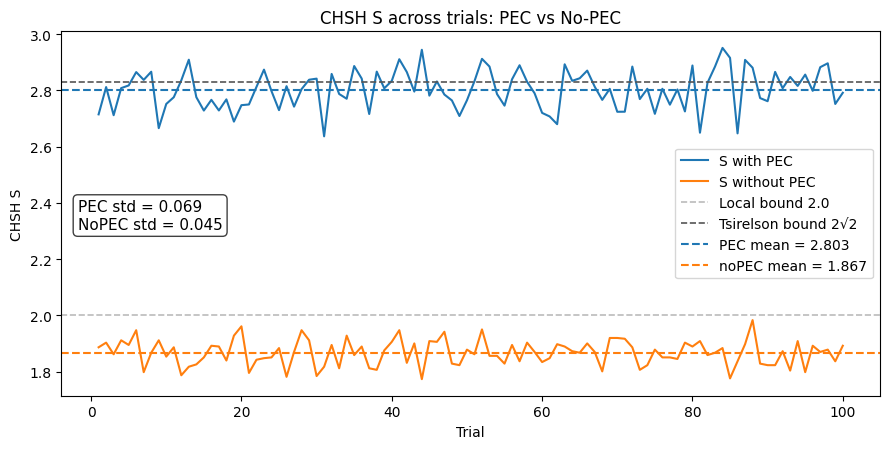

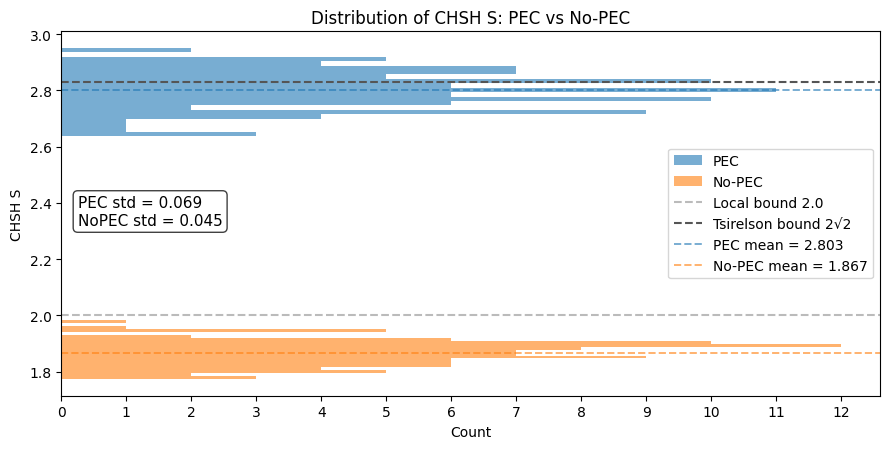

[SAVE] CHSH_trial → output_graph/20251122-143516_100/CHSH_trial.png
[SAVE] CHSH_distribution → output_graph/20251122-143516_100/CHSH_distribution.png


In [127]:
# ======  畫圖：折線 + 兩條平均線；以及分布（直方圖） ======
dark_gray = "#555555"  
light_gray = "#bbbbbb"
# 折線圖（每次 trial 的 S 值）
plt.figure(figsize=(9,4.6))
fig_trial = plt.gcf() 
line_pec, = plt.plot(range(1, n_trials+1), S_pec, label="S with PEC")
line_nopec, = plt.plot(range(1, n_trials+1), S_nopec, label="S without PEC")
plt.axhline(2.0, linestyle="--", linewidth=1.2, color=light_gray, label="Local bound 2.0")
plt.axhline(2*np.sqrt(2), linestyle="--", linewidth=1.2, color=dark_gray, label="Tsirelson bound 2√2")
plt.axhline(summary["PEC_mean"], linestyle="--", color=line_pec.get_color(), label=f"PEC mean = {summary['PEC_mean']:.3f}")
plt.axhline(summary["noPEC_mean"], linestyle="--", color=line_nopec.get_color(), label=f"noPEC mean = {summary['noPEC_mean']:.3f}")
plt.xlabel("Trial")
plt.ylabel("CHSH S")
plt.title("CHSH S across trials: PEC vs No-PEC")
textstr = (
    f"PEC std = {summary['PEC_std']:.3f}\n"
    f"NoPEC std = {summary['noPEC_std']:.3f}"
)
plt.gca().text(
    0.02, 0.45, textstr,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='bottom',
    horizontalalignment='left',
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.75)
)
plt.legend()
plt.tight_layout()
plt.show()

# 直方圖（分布比較）
plt.figure(figsize=(9,4.6))
fig_dist = plt.gcf() 
n_pec, bins_pec, patches_pec = plt.hist(S_pec, bins=max(10, n_trials//5), alpha=0.6, label="PEC", orientation="horizontal")
n_nopec, bins_nopec, patches_nopec = plt.hist(S_nopec, bins=max(10, n_trials//5), alpha=0.6, label="No-PEC", orientation="horizontal")
plt.axhline(2.0, linestyle="--", color=light_gray, label="Local bound 2.0")
plt.axhline(2*np.sqrt(2), linestyle="--", color=dark_gray, label="Tsirelson bound 2√2")
plt.axhline(summary["PEC_mean"], linestyle="--", color=patches_pec[0].get_facecolor(), linewidth=1.4, label=f"PEC mean = {summary['PEC_mean']:.3f}")
plt.axhline(summary["noPEC_mean"], linestyle="--", color=patches_nopec[0].get_facecolor(), linewidth=1.4, label=f"No-PEC mean = {summary['noPEC_mean']:.3f}")
max_count = int(max(n_pec.max(), n_nopec.max()))
plt.xticks(range(max_count + 1))
plt.xlabel("Count")
plt.ylabel("CHSH S")
plt.title("Distribution of CHSH S: PEC vs No-PEC")
textstr = (
    f"PEC std = {summary['PEC_std']:.3f}\n"
    f"NoPEC std = {summary['noPEC_std']:.3f}"
)
plt.gca().text(
    0.02, 0.55, textstr,
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top',
    horizontalalignment='left',
    bbox=dict(boxstyle="round", facecolor="white", alpha=0.75)
)
plt.legend()
plt.tight_layout()
plt.show()
save_dir = RR.save_chsh_figures(fig_trial, fig_dist, n_trials, parent_dir="output_graph")